

## Importando as Bibliotecas(libs) necessárias para performar uma análise de dados com plotagem de gráficos e dela retirar insights



#### NOTA: Devido ao uso do parâmetro plt.rcParams["figure.figsize"] em diferentes tamanhos para cada gráfico, os cluster do google colab podem demorar à registrar cada um deles no carregamento inicial do projeto, recomenda-se rodar os gráficos mais de uma vez no momento da visualização do projeto para que eles se adequem corretamente às configurações.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importando o arquivo que será analisado 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ArquivosBootcamp/BoilingSteam_com_LinuxGamersSurvey_Q1_2016_Public_Sharing_Only.csv")

### Visualizando os dados brutos(raw), e descobrindo que tipos de dados compõe o dataset escolhido

In [3]:
df.head()

,Time,Geography,Age,Gender,FamilySituation,DesktopOS,LinuxHardware,WorkOS,LinuxUserHowLong,LinuxUsageWhy,LinuxStayWhy,DesktopLinuxGamerHowLong,DesktopLinuxGamerWhy,HeavyGamer,DevicesForGames,GamesPlayedRecently,MainDeviceLinuxGaming,LinuxExclusivity,LinuxExclusiveGamesExamples,LinuxGamingHabitChange,LinuxGamingHabitChangeComment,LinuxGamingHabitFuture,LinuxGamingMachineShared,FolksAroundYouAwareLinux,LinuxGamesPurchaseFrequency,LinuxGamesResellersEverUsed,LinuxGamesResellersUsedLastMonth,LinuxGamesBoughtRecently,LinuxGamesMainReseller,DRMStance,SatisfactionSteam,SatisfactionGOG,SatisfactionHB,SatisfactionComment,LinuxGamingDistro,DistroChangeFrequency,DistroImpactPerformance,LinuxGamingMainGPU,LinuxGamingMainGPUModel,HardwareUpgradeIntent,HardwareUpgradeIntentGame,AwarenessBrandedSteamMachines,AwarenessSteamController,AwarenessSteamLink,SteamMachinesConceptLike,SteamMachinesExpandLinuxGaming,SteamMachinesLaunchEvaluation,SteamMachinesAwarenessAlienware,SteamMachinesAwarenessZotac,SteamMachinesAwarenessSyber,SteamMachinesWantToBuy,SteamMachinesMaximumPrice,SteamMachinesPurchasedWhy,SteamMachinesDIYIntent,SteamControllerPurchaseIntent,SteamControllerLike,SteamOSEverTried,SteamOSEverTriedComment,SteamIHSUsage,SteamLinkPurchaseIntent,SteamLinkComment,WINEUsageVanilla,WINEUsagePlayOnLinux,WINEUsageCrossover,WINEEvaluation,WINEStance,LeastEvil,LinuxGamingNewsSources,LinuxGamingWebsites,LinuxGamingHoursPerWeek,LinuxGamingSpendingPerMonth,LinuxGamingWebsitesOpinion,ShareAnswersPublicly
0,Timestamp,In which of the following geographies do you l...,How old are you ? (optional),Please indicate your gender (optional),What is your family/living situation ? (optional),What Desktop Operating Systems do you use at H...,On what kind of hardware do you use Linux at h...,"For work or at your workplace, what Desktop Op...",For how long have you been a Linux user?,What has been driving you to use Linux in the ...,What made you stay on linux after trying it ? ...,For how long have you been a Desktop Linux gam...,What was the trigger to make you start playing...,Do you consider yourself a heavy gamer?,On what kind of devices do you play games regu...,Can you name a couple of games you are playing...,What is your main device for Linux Gaming ?,If you play on Linux as well as other platform...,Can you name a couple of games you are playing...,How has your Linux Gaming Habit changed in the...,"Can you comment on your above answer, whether ...",Do you expect your use of Linux for Gaming to ...,Is your Linux Gaming Machine shared with other...,"If you live together with other people, are th...",How often do you buy new games for Linux?,Have you ever bought games for Linux from the ...,In the past month (March 2016) which service d...,Can you name a couple of Linux games you have ...,From which service do most of your Linux games...,What describes best your stance about DRMs ? (...,What is your Overall Satisfaction with the fol...,What is your Overall Satisfaction with the fol...,What is your Overall Satisfaction with the fol...,"If you have any issue with the above services,...",What distro are you mainly using for Linux gam...,Do you change distros often ?,Do you think specific distributions or specifi...,What is your main GPU hardware brand for Linux...,Feel free to mention your GPU model if you wis...,Do you plan to upgrade your hardware in 2016 f...,"If you plan to upgrade, is there a particular ...",Please let us know how much you know about the...,Please let us know how much you know about the...,Please let us know how much you know about the...,Steam Machines are PC-hardware based consoles ...,Overall do you think Valve's Steam Machines wi...,What did you think of Valve's Steam Machines L...,Please indicate if you are aware of the follow...,Please indicate if you are aware of the follow...,Please indicate if you are aware of the follow...,Would you buy / Have you bought a Branded Stea...,If you plan or consider buying one of the comm...,If you are

In [4]:
df.shape

(560, 73)

In [5]:
df.dtypes

Time                           object
Geography                      object
Age                            object
Gender                         object
FamilySituation                object
                                ...  
LinuxGamingWebsites            object
LinuxGamingHoursPerWeek        object
LinuxGamingSpendingPerMonth    object
LinuxGamingWebsitesOpinion     object
ShareAnswersPublicly           object
Length: 73, dtype: object

In [6]:
df.columns

Index(['Time', 'Geography', 'Age', 'Gender', 'FamilySituation', 'DesktopOS',
       'LinuxHardware', 'WorkOS', 'LinuxUserHowLong', 'LinuxUsageWhy',
       'LinuxStayWhy', 'DesktopLinuxGamerHowLong', 'DesktopLinuxGamerWhy',
       'HeavyGamer', 'DevicesForGames', 'GamesPlayedRecently',
       'MainDeviceLinuxGaming', 'LinuxExclusivity',
       'LinuxExclusiveGamesExamples', 'LinuxGamingHabitChange',
       'LinuxGamingHabitChangeComment', 'LinuxGamingHabitFuture',
       'LinuxGamingMachineShared', 'FolksAroundYouAwareLinux',
       'LinuxGamesPurchaseFrequency', 'LinuxGamesResellersEverUsed',
       'LinuxGamesResellersUsedLastMonth', 'LinuxGamesBoughtRecently',
       'LinuxGamesMainReseller', 'DRMStance', 'SatisfactionSteam',
       'SatisfactionGOG', 'SatisfactionHB', 'SatisfactionComment',
       'LinuxGamingDistro', 'DistroChangeFrequency', 'DistroImpactPerformance',
       'LinuxGamingMainGPU', 'LinuxGamingMainGPUModel',
       'HardwareUpgradeIntent', 'HardwareUpgradeIntentGame'

## Retirando Colunas não necessárias para a análise
#### Como se sabe as steam machines, tipo de console, não foram bem aceitas pelo público e acabaram por ser descontinuadas pela empresa 

In [7]:
df.drop(columns=['AwarenessBrandedSteamMachines','SteamMachinesConceptLike','SteamMachinesExpandLinuxGaming', 'SteamMachinesLaunchEvaluation','SteamMachinesAwarenessAlienware', 'SteamMachinesAwarenessZotac','SteamMachinesAwarenessSyber', 'SteamMachinesWantToBuy','SteamMachinesMaximumPrice', 'SteamMachinesPurchasedWhy','SteamMachinesDIYIntent'], inplace = True)

In [8]:
df.shape

(560, 62)

#### Poucos anos depois das steam machines serem retiradas do mercado, o mesmo aconteceu com os steam controllers, mesmo que alguns ainda funcionem, esse dado deve ser limpo a fim de simplificar a visualização do dataframe e criação de insights




In [9]:
df.drop(columns=['AwarenessSteamController','SteamControllerPurchaseIntent','SteamControllerLike'], inplace=True)

#### A Coluna time pode ser retirada deste dataset, pois, esta pesquisa foi realizada no primeiro trimestre(quarter) de 2016, não tendo relevância alta por ser um curto período de tempo

In [10]:
df.drop(columns=['Time'], inplace=True)

#### O Steam Link é um device parecido com o nVidia Shield, cujo propósito é ser um link entre o jogo rodando num computador que será transmitido por ele a uma televisão ou projetor, sendo compatível com vários sistemas operacionais, ele não se encaixará nesta análise de dados que tem foco nos usuários de sistemas baseados em  kernel Linux

In [11]:
df.drop(columns=['AwarenessSteamLink','SteamLinkPurchaseIntent','SteamLinkComment'], inplace = True)

#### A coluna share answers publicly pode ser retiradas deste dataset, pois, como esta pesquisa foi publicada pode-se concluir que apenas as respostas sim estão incluídas neste conjunto de dados

In [12]:
#Validação da hipóstese acima

df.loc[df["ShareAnswersPublicly"] == "No"] 

,Geography,Age,Gender,FamilySituation,DesktopOS,LinuxHardware,WorkOS,LinuxUserHowLong,LinuxUsageWhy,LinuxStayWhy,DesktopLinuxGamerHowLong,DesktopLinuxGamerWhy,HeavyGamer,DevicesForGames,GamesPlayedRecently,MainDeviceLinuxGaming,LinuxExclusivity,LinuxExclusiveGamesExamples,LinuxGamingHabitChange,LinuxGamingHabitChangeComment,LinuxGamingHabitFuture,LinuxGamingMachineShared,FolksAroundYouAwareLinux,LinuxGamesPurchaseFrequency,LinuxGamesResellersEverUsed,LinuxGamesResellersUsedLastMonth,LinuxGamesBoughtRecently,LinuxGamesMainReseller,DRMStance,SatisfactionSteam,SatisfactionGOG,SatisfactionHB,SatisfactionComment,LinuxGamingDistro,DistroChangeFrequency,DistroImpactPerformance,LinuxGamingMainGPU,LinuxGamingMainGPUModel,HardwareUpgradeIntent,HardwareUpgradeIntentGame,SteamOSEverTried,SteamOSEverTriedComment,SteamIHSUsage,WINEUsageVanilla,WINEUsagePlayOnLinux,WINEUsageCrossover,WINEEvaluation,WINEStance,LeastEvil,LinuxGamingNewsSources,LinuxGamingWebsites,LinuxGamingHoursPerWeek,LinuxGamingSpendingPerMonth,LinuxGamingWebsitesOpinion,ShareAnswersPublicly


In [13]:
df.drop(columns=["ShareAnswersPublicly"], inplace=True)

### Verificando a existência de dados nulos em nosso dataset

In [14]:
df.isnull().sum()

Geography                           117
Age                                 185
Gender                              136
FamilySituation                     150
DesktopOS                           117
LinuxHardware                       117
WorkOS                              117
LinuxUserHowLong                    117
LinuxUsageWhy                       309
LinuxStayWhy                        331
DesktopLinuxGamerHowLong            117
DesktopLinuxGamerWhy                325
HeavyGamer                          117
DevicesForGames                     117
GamesPlayedRecently                 237
MainDeviceLinuxGaming               117
LinuxExclusivity                    117
LinuxExclusiveGamesExamples         282
LinuxGamingHabitChange              117
LinuxGamingHabitChangeComment       428
LinuxGamingHabitFuture              117
LinuxGamingMachineShared            120
FolksAroundYouAwareLinux            197
LinuxGamesPurchaseFrequency         117
LinuxGamesResellersEverUsed         117


In [15]:
### Caso haja em nosso dataset alguma linha com todos os valores nulos, ela deverá ser retirada

df.dropna(how="all", inplace=True)

In [16]:
df.shape

(444, 54)

#### A execução do código acima nos revela que das 560 linhas originais, 117 tinham todos os valores nelas contidos nulos

In [17]:
df.describe

<bound method NDFrame.describe of                                              Geography  ...                         LinuxGamingWebsitesOpinion
0    In which of the following geographies do you l...  ...  What is your opinion of Linux Gaming News Site...
1    Western Europe (ex: France, UK, Germany, Spain...  ...                                             biased
2                              North America Continent  ...                                    needs more news
3    Western Europe (ex: France, UK, Germany, Spain...  ...                                                NaN
4    Eastern Europe (ex: Poland, Hungary, etc...not...  ...                                                NaN
..                                                 ...  ...                                                ...
552          Northern Europe (Sweden, Finland, etc...)  ...                                                NaN
553  Western Europe (ex: France, UK, Germany, Spain...  ...                   

In [18]:
### Verificando quais colunas tem a maior quantidade de dados nulos após a primeira fase de limpeza dos dados

df.isnull().sum()

Geography                             1
Age                                  69
Gender                               20
FamilySituation                      34
DesktopOS                             1
LinuxHardware                         1
WorkOS                                1
LinuxUserHowLong                      1
LinuxUsageWhy                       193
LinuxStayWhy                        215
DesktopLinuxGamerHowLong              1
DesktopLinuxGamerWhy                209
HeavyGamer                            1
DevicesForGames                       1
GamesPlayedRecently                 121
MainDeviceLinuxGaming                 1
LinuxExclusivity                      1
LinuxExclusiveGamesExamples         166
LinuxGamingHabitChange                1
LinuxGamingHabitChangeComment       312
LinuxGamingHabitFuture                1
LinuxGamingMachineShared              4
FolksAroundYouAwareLinux             81
LinuxGamesPurchaseFrequency           1
LinuxGamesResellersEverUsed           1


### A informação acima será de suma importância para que ao agrupar dados não selecionemos colunas com grande número de valores nulos, refinando a análise e trazendo veracidade à elas

In [19]:
# Retirando a linha de índice 0, afim de facilitar a transformação de dados numéricos e criando um novo dataframe que será utilizado daqui em diante

df['Index'] = df.index
df_limpo = df.drop(df.index[0])

In [20]:
df_limpo.head(2)

,Geography,Age,Gender,FamilySituation,DesktopOS,LinuxHardware,WorkOS,LinuxUserHowLong,LinuxUsageWhy,LinuxStayWhy,DesktopLinuxGamerHowLong,DesktopLinuxGamerWhy,HeavyGamer,DevicesForGames,GamesPlayedRecently,MainDeviceLinuxGaming,LinuxExclusivity,LinuxExclusiveGamesExamples,LinuxGamingHabitChange,LinuxGamingHabitChangeComment,LinuxGamingHabitFuture,LinuxGamingMachineShared,FolksAroundYouAwareLinux,LinuxGamesPurchaseFrequency,LinuxGamesResellersEverUsed,LinuxGamesResellersUsedLastMonth,LinuxGamesBoughtRecently,LinuxGamesMainReseller,DRMStance,SatisfactionSteam,SatisfactionGOG,SatisfactionHB,SatisfactionComment,LinuxGamingDistro,DistroChangeFrequency,DistroImpactPerformance,LinuxGamingMainGPU,LinuxGamingMainGPUModel,HardwareUpgradeIntent,HardwareUpgradeIntentGame,SteamOSEverTried,SteamOSEverTriedComment,SteamIHSUsage,WINEUsageVanilla,WINEUsagePlayOnLinux,WINEUsageCrossover,WINEEvaluation,WINEStance,LeastEvil,LinuxGamingNewsSources,LinuxGamingWebsites,LinuxGamingHoursPerWeek,LinuxGamingSpendingPerMonth,LinuxGamingWebsitesOpinion,Index
1,"Western Europe (ex: France, UK, Germany, Spain...",24,Male,Living with Parents,Linux,Desktop PC,Linux,Less than a year,Security and privacy. (with some black sheep *...,I like the feel.,Less than a year,More support by devs.,Very much so,Desktop PC,"Factorio, Dying Light, Deponia",Desktop PC,I play EXCLUSIVELY on Linux,"Factorio, Dying Light, Deponia",I play much more on Linux now,"Positive, i love it.",I intend to play much more on Linux in the nea...,"No, it's just me using it","Yes, they know about it and are actually Linux...",Every week,"Steam, GOG, Humble Bundle, Factorio",GOG,"Factorio, Dying Light, Deponia",Steam,I don't like DRM and I make sure that I never ...,Poor,Good,Poor,Gog needs Galaxy! badly. Steam is DRM(most gam...,Linux Mint,I'm rather stable,"Yes, I think it does, and their impact can be ...",AMD,R9 390X,"Yes, most certainly",Arma 3 and Total War Warhammer,"Yes, I have tried before but not using right now",I don't like it,"Yes, I am using it right now on two of my mac...",Rarely use it for Gaming,Using it sometimes for Gaming,Using it sometimes for Gaming,It works reasonably well,WINE is one of the key reason why developers d...,Refusing to run any non-native/non-packaged ga...,"Social Networks (eg. Reddit, Facebook), Newsle...","Gaming on Linux, BoilingSteam, Ars(e) Technica...",60,150,biased,1
2,North America Continent,NaN,Male,It's complicated,"Linux, Windows","Desktop PC, Laptop PC (Intel x86 or AMD)",Windows,Between five years and ten years,free and safe,being safe,Less than a year,safe OS,Very much so,Desktop PC,skyrim,Desktop PC,I play more on other formats than on Linux,NaN,I play much more on Linux now,positively GPU drivers,I intend to play much more on Linux in the nea...,"No, it's just me using it","Yes, they know about it and are actually Linux...",Once a month or so,Steam,Steam,NaN,Steam,NaN,Very good,No Opinion,Very good,NaN,play on linux,I'm rather stable,"Yes, I think it does, and their impact can be ...",AMD,r9 380 4gb,"Yes, most certainly",skyrim,"No, I have never tried it.",NaN,"No, I have never tried it.",Never used it for Gaming,Using it frequently for Gaming,I don't know what it is.,It works reasonably well,WINE is a great project that bridges the gap b...,Keeping a Dual Boot Partition to enjoy Windows...,"Social Networks (eg. Reddit, Facebook), Youtub...","Gaming on Linux, Redit",30,30,needs more news,2


## Iniciando a análise de dados

In [21]:
df_limpo["Geography"].value_counts()

Western Europe (ex: France, UK, Germany, Spain, Italy, etc)         176
North America Continent                                             132
Eastern Europe (ex: Poland, Hungary, etc...not including Russia)     45
Northern Europe (Sweden, Finland, etc...)                            26
Oceania (NZ, Australia, etc)                                         17
South America Continent                                              17
Middle-East                                                           7
Russia                                                                6
Africa                                                                5
South-East Asia (Malaysia, Singapore, Indonesia, etc...)              3
North-East Asia (Korea, Japan, etc)                                   2
Asia (China. India, Pakistan)                                         2
Central Europe (there is also Central Europe...)                      1
Southern Europe                                                 

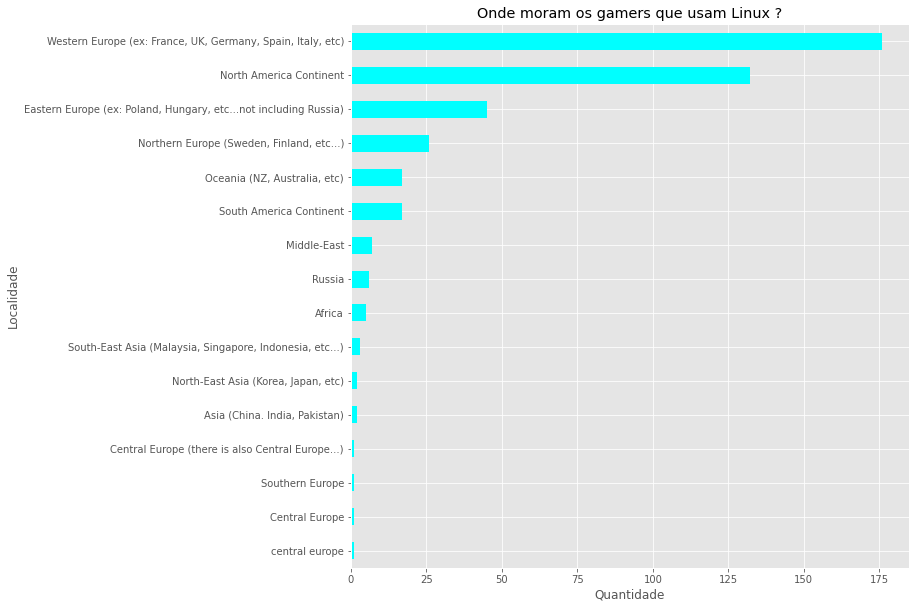

In [108]:
df_limpo["Geography"].value_counts(ascending=True).plot.barh(color="cyan", title = "Onde moram os gamers que usam Linux ?")
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Quantidade")
plt.ylabel("Localidade");

### O Gráfico acima mostra uma tendência socioeconômica, pois, os Continentes mais desenvolvidos tem maiores quantidades de usuários Linux, também uma tendência dos usuários que utilizam o alfabeto latino/romano a ter distros linux instaladas, pois, como estes sistemas são desenvolvidos em linguagem de programação que tem como base o inglês, nativos de diferentes alfabetos como o Círilico Russo, os kanjis asiáticos, etc; terão a barreira do idioma para passar antes que possma utilizar opções avançadas Linux, necessárias para jogar no sistema no início de 2016

In [23]:
### Convertendo e substituindo valores da coluna Age
#### Enough se tornará 18
#### late 20s se tornará 28
#### 25-30 se tornará 27

df_limpo['Age'] = df_limpo['Age'].replace(['Enough'],'18')
df_limpo['Age'] = df_limpo['Age'].replace(['late 20s'],'28')
df_limpo['Age'] = df_limpo['Age'].replace(['25-30'],'27')


In [24]:
df_limpo["Age"].value_counts( normalize=True, ascending=False)

21    0.066845
31    0.061497
22    0.053476
27    0.050802
30    0.050802
25    0.048128
20    0.048128
28    0.048128
26    0.045455
32    0.045455
23    0.042781
18    0.042781
34    0.040107
24    0.037433
19    0.037433
33    0.034759
29    0.034759
36    0.026738
17    0.026738
40    0.021390
35    0.021390
39    0.021390
16    0.018717
37    0.013369
38    0.010695
43    0.010695
41    0.010695
45    0.005348
47    0.005348
44    0.005348
13    0.002674
63    0.002674
42    0.002674
46    0.002674
52    0.002674
Name: Age, dtype: float64

In [25]:
Age=['21','31','22','30','27','28','25','20','32','26','18','23','34','19','24','29','33','17','36','35','40','39','16','37','41','38','43','47','44','45','63','46','13','52','42']
Percentage=['0.066845','0.061497','0.053476','0.050802','0.050802','0.048128','0.048128','0.048128','0.045455','0.045455','0.042781','0.042781','0.040107','0.037433','0.037433','0.034759','0.034759','0.026738','0.026738','0.021390','0.021390','0.021390','0.018717','0.013369','0.010695','0.010695','0.010695','0.005348','0.005348','0.005348','0.002674','0.002674','0.002674','0.002674','0.002674']
dfidade_porcentagem = pd.DataFrame({'Age':Age ,
                   'Percentage':Percentage })

In [26]:
dfidade_porcentagem.dtypes

Age           object
Percentage    object
dtype: object

In [27]:
### Soma dos usuários de até 40 anos

dfidade_porcentagem["Age"] = pd.to_numeric(dfidade_porcentagem["Age"])
dfidade_porcentagem["Percentage"] = pd.to_numeric(dfidade_porcentagem["Percentage"])
dfidade_porcentagem.dtypes



Age             int64
Percentage    float64
dtype: object

In [28]:
dfidade_porcentagemmenos40 = dfidade_porcentagem.drop([24,26,27,28,29,30,31,33,34])

In [29]:
dfidade_porcentagemmenos40.sum()

Age           713.00000
Percentage      0.95187
dtype: float64

#### Os usuários de linux que costumam jogar videogame em seus próprios computadores com até 40 anos representam 95,187% do total, aproximadamente 357 pessoas(número após subtrair os 68 valores nulos da coluna "Age"

In [30]:
df_limpo["Age"] = pd.to_numeric(df_limpo["Age"])

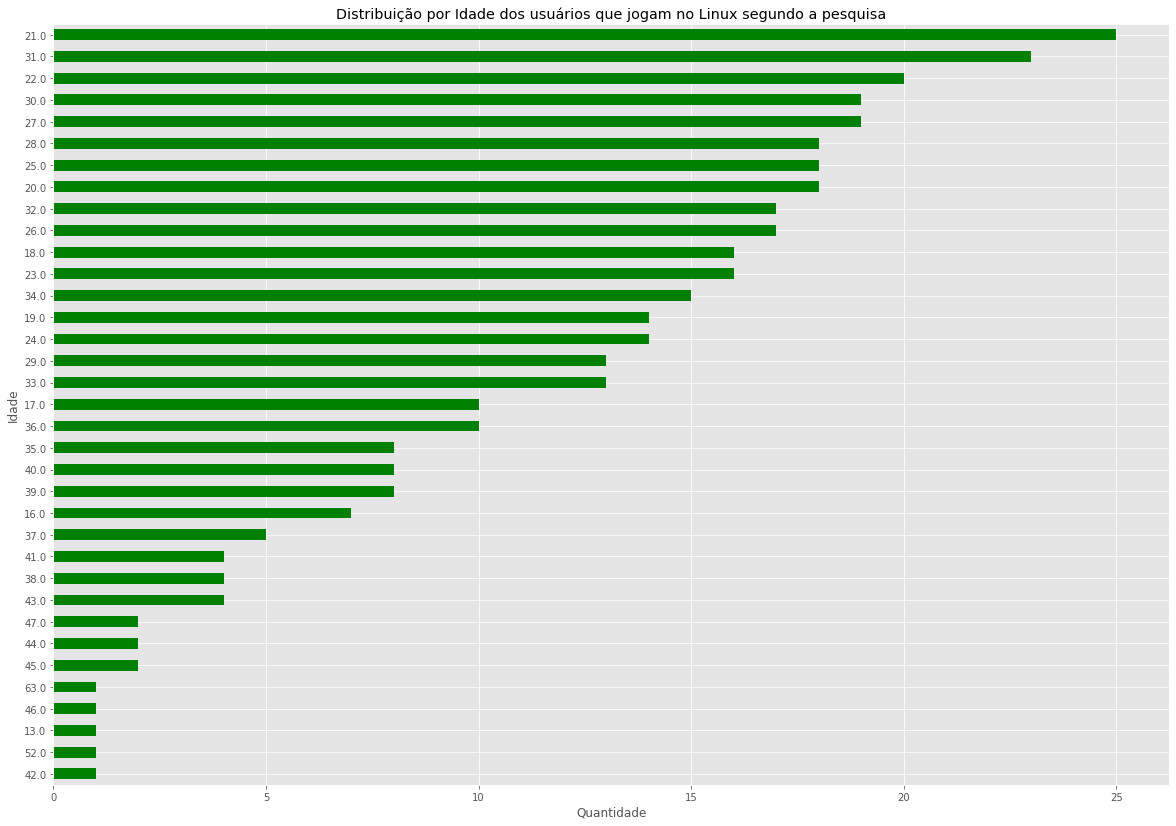

In [104]:
df_limpo["Age"].value_counts(ascending=True).plot.barh(color = "green", title = "Distribuição por Idade dos usuários que jogam no Linux segundo a pesquisa" )
plt.rcParams["figure.figsize"] = (20,14)
plt.xlabel("Quantidade")
plt.ylabel("Idade");

In [32]:
df_limpo["Age"].describe()

count    374.000000
mean      27.673797
std        7.360172
min       13.000000
25%       22.000000
50%       27.000000
75%       32.000000
max       63.000000
Name: Age, dtype: float64

#### A média de idade dos usuários linux que são gamers e utilizam suas máquinas linux para jogar é de 27,67 anos ou aproximadamente 28 anos. As pessoas mais velha e mais nova, tem respectivamente 63 anos e 13 anos, segundo a pesquisa.

In [33]:
df_limpo["Gender"].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [34]:
df_limpo["Gender"].describe()

count      423
unique       3
top       Male
freq       410
Name: Gender, dtype: object

In [35]:
df_limpo.loc[df_limpo["Gender"] == "Female"].shape

(7, 55)

In [36]:
df_limpo.loc[df_limpo["Gender"] == "Other"].shape

(6, 55)

### Podemos notar que a maioria esmagadora dos usuários de linux que jogam no próprio sistema pertence ao sexo masculino através do gráfico abaixo

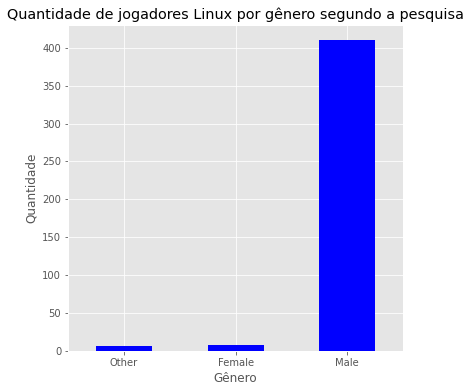

In [101]:
df_limpo["Gender"].value_counts(ascending=True).plot.bar(color = "blue", title = "Quantidade de jogadores Linux por gênero segundo a pesquisa")
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.xticks(rotation='horizontal');

### Analisando as horas jogadas 

In [38]:
df_limpo["LinuxGamingHoursPerWeek"].unique()

array(['60', '30', '20', '35', '6', '8', '10', '25', '1', '5', '15', '7',
       '2', '4', '12', '40', '16', '15-20', '0', '24', '3', '~7',
       '15-20h', '14',
       '10 hours or less because in this period I am very busy. However I only play linux games',
       '2-3', '5h/week', '9', '11', '10-20', '28', '15h', '18', '23',
       '70', '41', nan, 'too many (20+)', '10 to 15', 'at least 30 hours',
       '50', '30 hrs', '84', '32', '14h', '80', '45', '4h', '7-8',
       '10-15', '21',
       'i binge, this week none last week literally 96 hours', '5-8',
       '10+', 'varies. 5-20 hours', '0.5', '22', '1-3h', '36', '13h'],
      dtype=object)

In [39]:
# Mudando valores na coluna LinuxGamingHoursPerWeek para converter para o tipo numérico e tirar dela mais informações
## ~7 se tornará 7
## 15-20h e 15-20 se tornarão 17.5
## 10 hours or less because in this period I am very busy. However I only play linux games se tornará 10
## 2-3 se tornará 2.5
## 5h/week se tornará 5
## 10-20 e 15h se tornarão 15
## too many (20+) se tornará 22
## 10 to 15, 10-15 e varies. 5-20 hours se tornarão 12.5
## at least 30 hours e 30 hrs se tornarão 30
## 14h se tornará 14
## 4h se tornará 4
## 7-8 se tornará 7.5
## i binge, this week none last week literally 96 hours se tornará 48 (96 dividido entre 2 semanas)
## 5-8 se tornará 6.5
## 10+ se tornará 11
## 1-3h se tornará 2
## 13h se tornará 13 


df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['~7'],'7')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['15-20h'],'17.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['15-20'],'17.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['10 hours or less because in this period I am very busy. However I only play linux games'],'10')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['2-3'],'2.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['5h/week'],'5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['10-20'],'15')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['15h'],'15')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['too many (20+)'],'22')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['10 to 15'],'12.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['10-15'],'12.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['varies. 5-20 hours'],'12.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['at least 30 hours'],'30')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['30 hrs'],'30')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['14h'],'14')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['4h'],'4')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['7-8'],'7.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['i binge, this week none last week literally 96 hours'],'48')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['5-8'],'6.5')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['10+'],'11')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['1-3h'],'2')
df_limpo['LinuxGamingHoursPerWeek'] = df_limpo['LinuxGamingHoursPerWeek'].replace(['13h'],'13')


In [40]:
df_limpo["LinuxGamingHoursPerWeek"].unique()

array(['60', '30', '20', '35', '6', '8', '10', '25', '1', '5', '15', '7',
       '2', '4', '12', '40', '16', '17.5', '0', '24', '3', '14', '2.5',
       '9', '11', '28', '18', '23', '70', '41', nan, '22', '12.5', '50',
       '84', '32', '80', '45', '7.5', '21', '48', '6.5', '0.5', '36',
       '13'], dtype=object)

In [41]:
df_limpo["LinuxGamingHoursPerWeek"] = pd.to_numeric(df_limpo["LinuxGamingHoursPerWeek"])

In [42]:
df_limpo["LinuxGamingHoursPerWeek"].describe()

count    442.000000
mean      16.053167
std       13.009634
min        0.000000
25%        7.000000
50%       12.500000
75%       20.000000
max       84.000000
Name: LinuxGamingHoursPerWeek, dtype: float64

### Pode-se concluir pelo gráfico abaixo que a maioria das pessoas que responderam à pesquisa tem uma rotina de jogos que varia de 10 a 30 horas de jogo por semana, portanto devem trabalhar ou estudar e jogam apenas no tempo livre. A média de horas jogadas confirma essa estimativa de horas, ficando um pouco acima das 16 horas jogadas por semana.

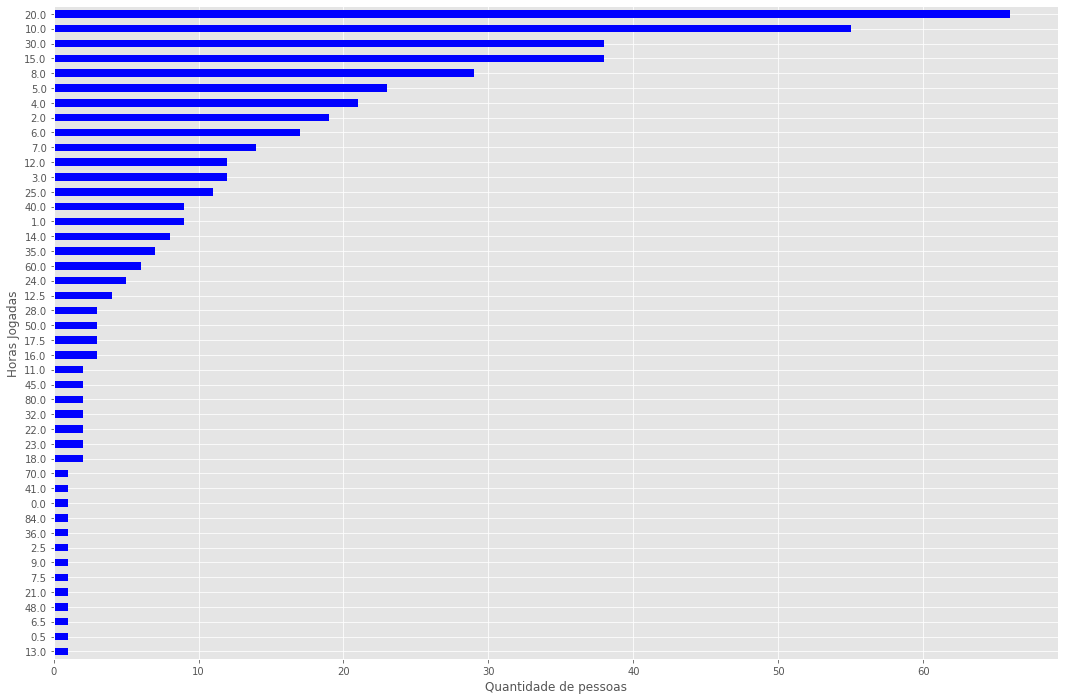

In [98]:
df_limpo["LinuxGamingHoursPerWeek"].value_counts(ascending=True).plot.barh(color = "blue" )
plt.rcParams["figure.figsize"] = (18,12)
plt.ylabel("Horas Jogadas")
plt.xlabel("Quantidade de pessoas")
plt.xticks(rotation='horizontal');

In [44]:
df_limpo["FamilySituation"].unique()

array(['Living with Parents', "It's complicated", 'Living Alone',
       'Living with Partner and kids', 'Living with Partner',
       'Living with Relatives (Not Your Parents)', nan,
       'Living with Partner, Kids and Parents',
       'Living with Non-Relatives (ex: Dormitory, Friends, Shared Apartment etc.)'],
      dtype=object)

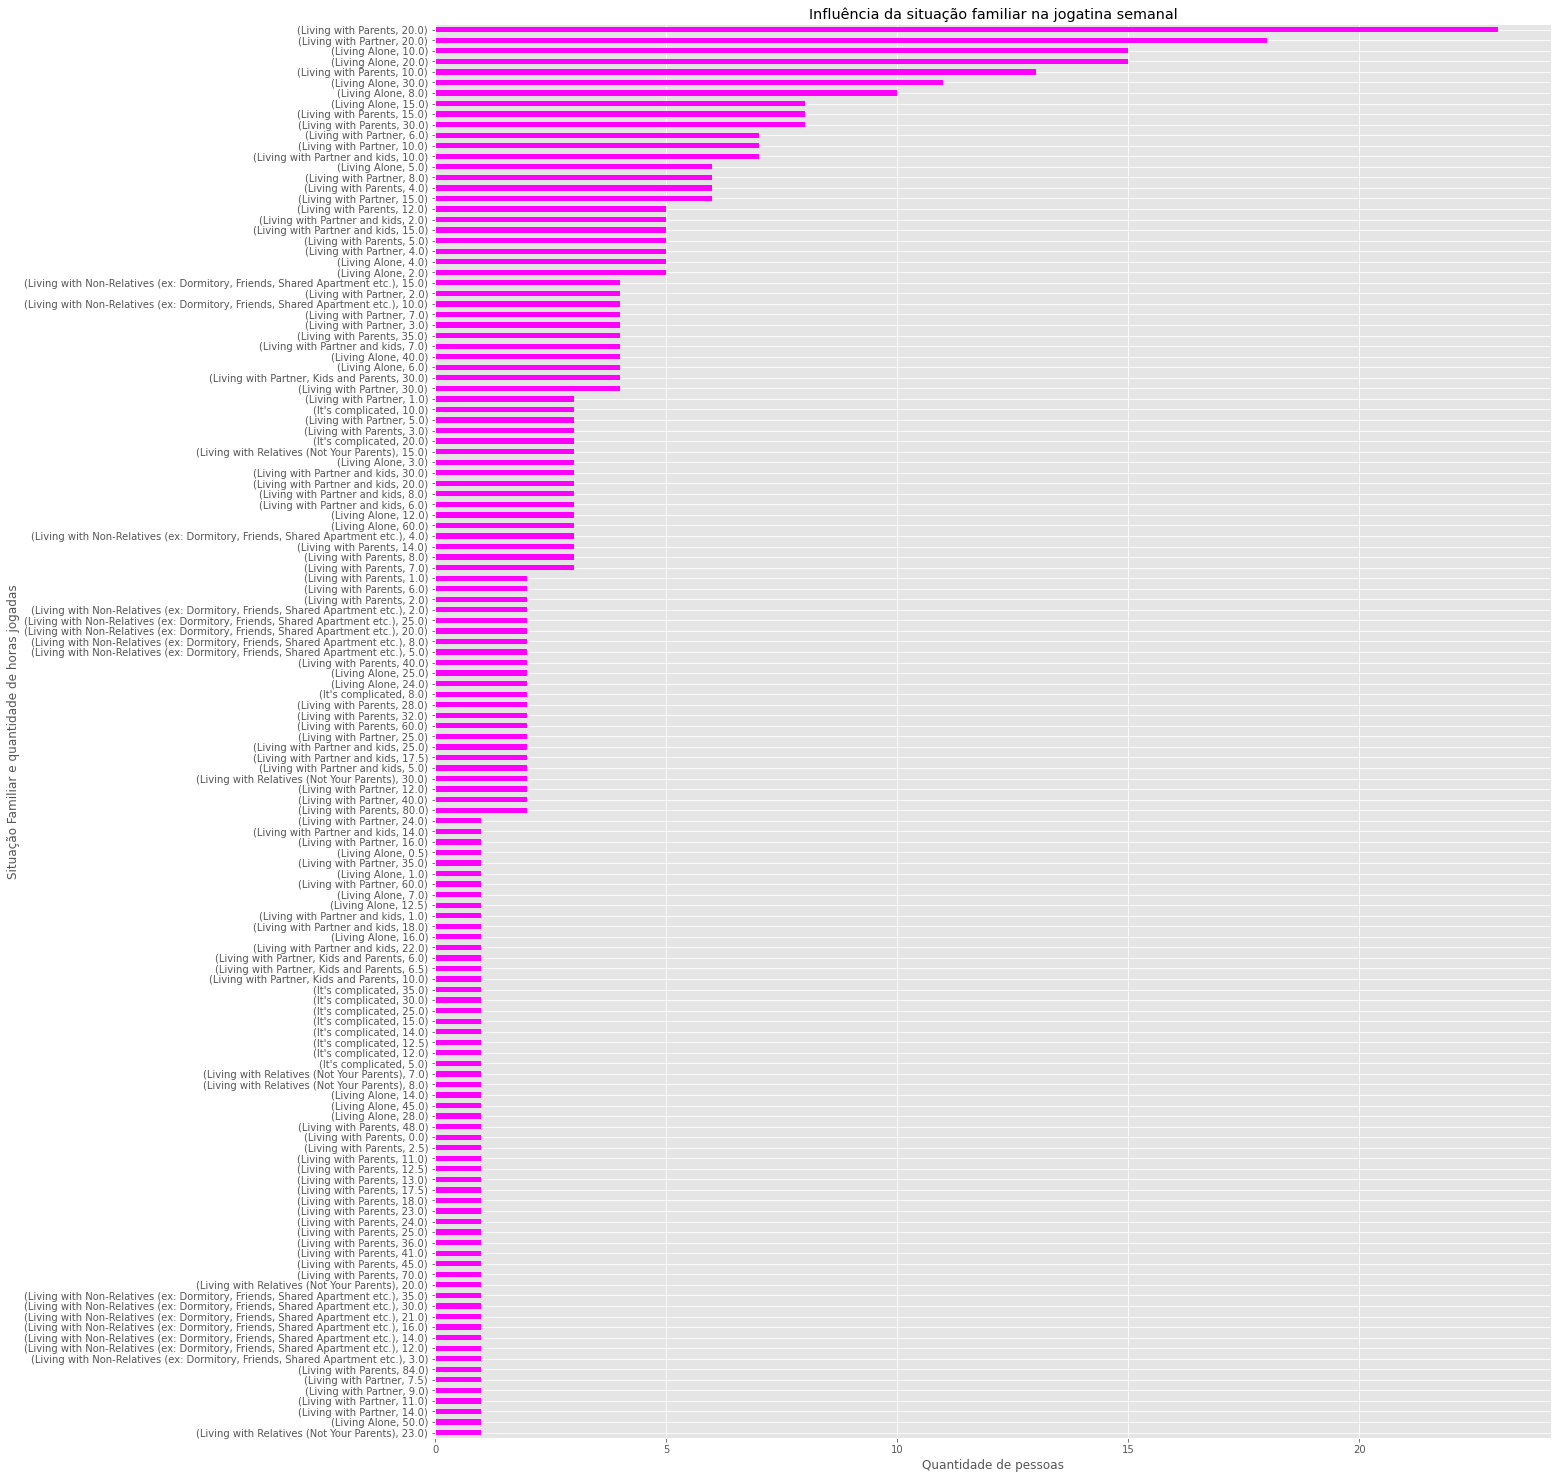

In [95]:
plt.style.use("ggplot")
df_limpo.groupby("FamilySituation")["LinuxGamingHoursPerWeek"].value_counts().sort_values(ascending=True).plot.barh(title="Influência da situação familiar na jogatina semanal", color = "magenta")
plt.rcParams["figure.figsize"] = (20,26)
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Situação Familiar e quantidade de horas jogadas");

### O Gráfico acima nos mostra que a maioria dos jogadores conseguem conciliar 10 a 20 horas por semana de jogo com a vida adulta tendo interação social, pois moram com seus/suas parceiros(as), e que a maioria das pessoas que conseguem passar mais de 40 horas por semana jogando em seus sistemas linux mora sozinho ou com seus pais, tendo provavelmente muita disponibilidade para jogar e pouca interação social

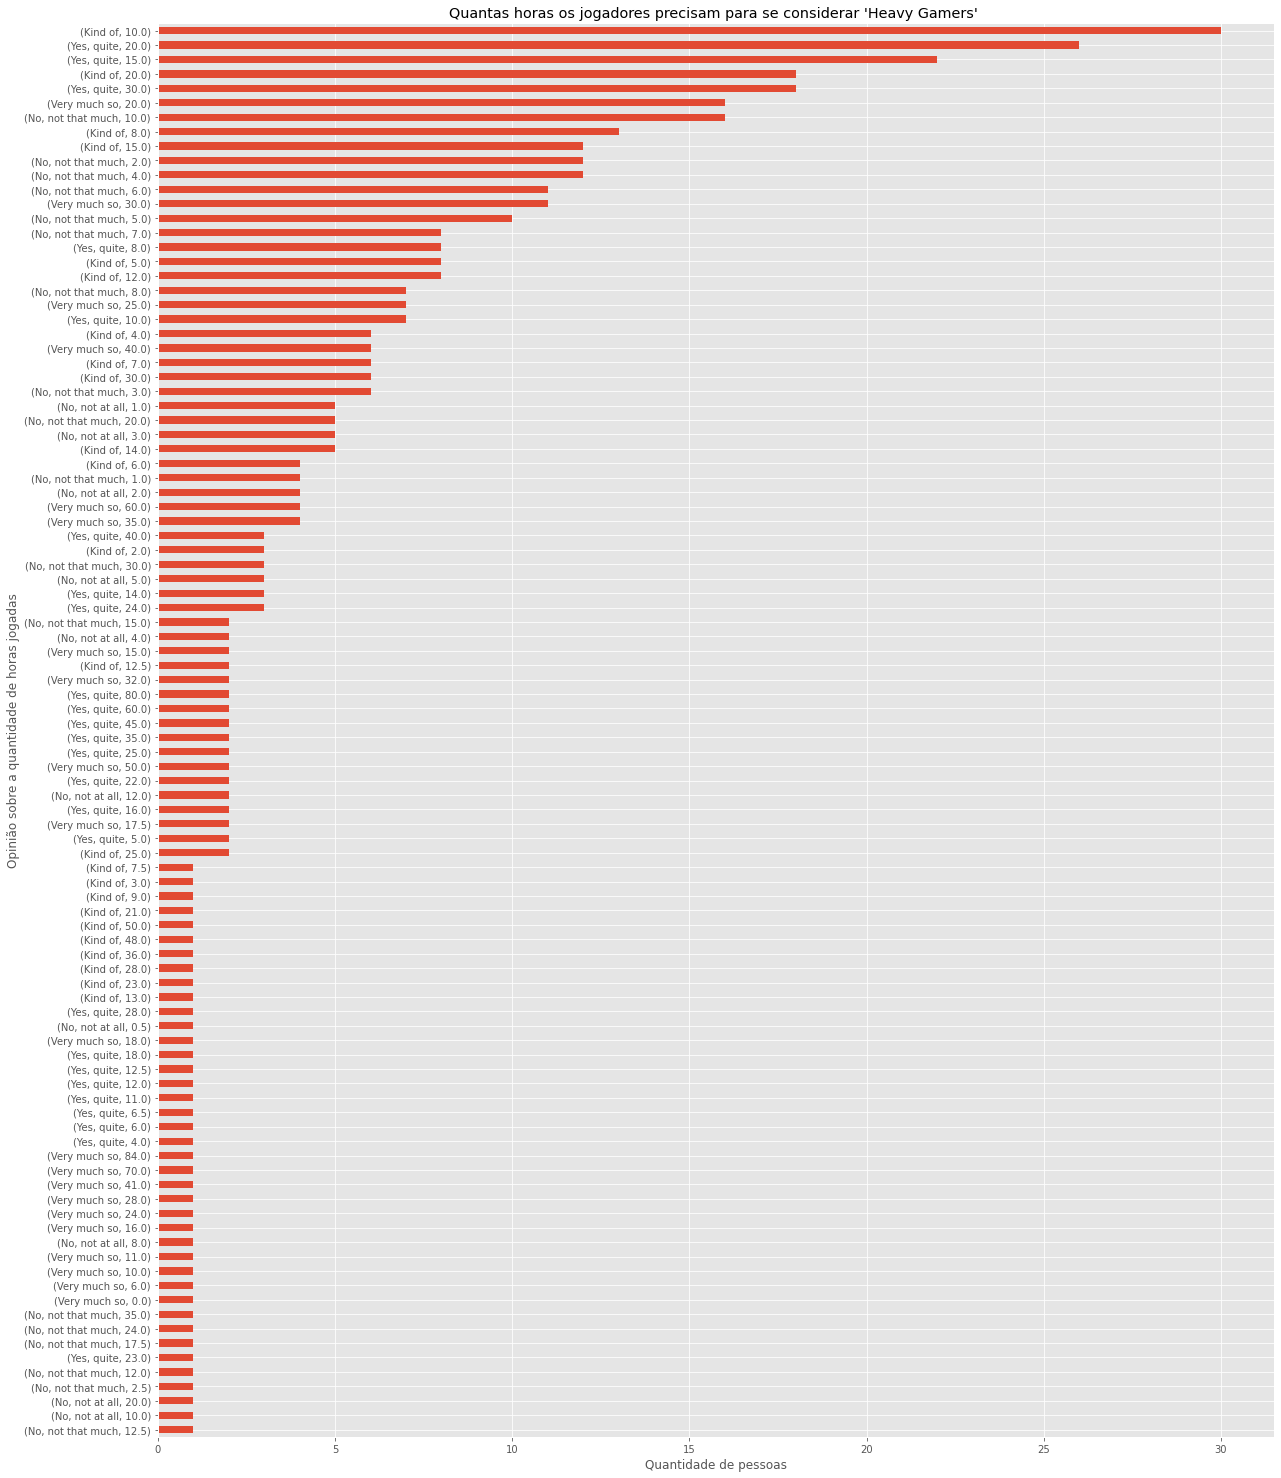

In [94]:
df_limpo.groupby("HeavyGamer")["LinuxGamingHoursPerWeek"].value_counts().sort_values(ascending=True).plot.barh(title="Quantas horas os jogadores precisam para se considerar 'Heavy Gamers' ")
plt.rcParams["figure.figsize"] = (20,26)
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Opinião sobre a quantidade de horas jogadas");

### O gráfico plotado acima mostra que há opiniões divergentes sobre o conceito de "Heavy Gamer", o jogador que se considera empenhado ou joga muitas horas.
####  - Boa parte considera de 10 a 30 horas semanais um patamar aceitável, ou acredita que com esse tempo já é um jogador assíduo, temos também aqueles que consideram um mínimo de 40 horas para o mesmo fim.
#### - Existem na outra ponta jogadores radicais que consideram as 10 a 30 horas da maioria como pouco e não se definem como "Heavy Gamers".
#### - Os maiores números de horas registrados, acima de 40 horas tem um incrível bom senso de se considerarem como dedicados aos jogos, em alguns casos chegando até a 80 horas semanais

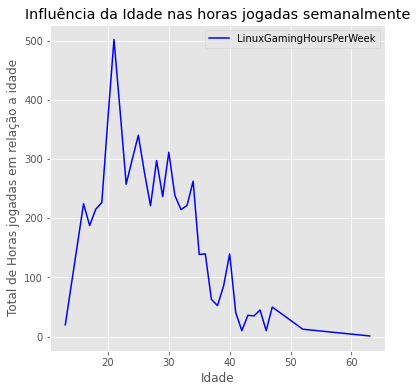

In [92]:
df_limpo.groupby(df_limpo["Age"])["LinuxGamingHoursPerWeek"].sum().plot(title = "Influência da Idade nas horas jogadas semanalmente", color ="blue")
plt.rcParams["figure.figsize"] = (14,10)
plt.xlabel("Idade")
plt.ylabel("Total de Horas jogadas em relação a idade")
plt.legend();

### Complementando a análise iniciada no gráfico anterior tem-se o agrupamento de das horas jogadas em relação à idade, neste caso o esperado ocorre e confirma algumas informações do gráfico anterior.
#### - A idade em que mais se joga segundo o dataset é dos 15 aos 21 anos tendo uma crescente abrupta nas horas jogadas totais para esse agrupamento de idade, após essa fase da vida as pessoas começam a ser inseridas no mercado de trabalho, diminuindo assim as horas disponíveis para se jogar.
#### - Dos 25 aos 30 existem picos que mostram provavelmente instabilidade e "correria" nas vidas das pessoas, tais como: saídas a noite, baladas, relacionamentos, saída da casa dos pais, etc. Situações que demandam tempo e dinheiro, diminuindo a possibilidade de jogar e comprar jogos.
#### - Dos 30 para frente inicia-se normalmente a vida com seu cônjuge, e uma preparação de casa, carro e adequação da vida para se ter um filho, deste modo falta tempo disponível para se gastar jogando, sendo que em meados dos 30 anos ocorre a maior queda na quantidade de horas jogadas, provavelmente aos 3-4 anos após se ter um filho, época na qual a criança demanda muito tempo e atenção, pois, começa a fase de maior desenvolvimento neural da mesma.
#### - Ocorre um curioso pico na região dos 40 anos, provavelmente pelo fato do filho(a) estar com aproximadamente 10 anos e começando a entrar na pré-adolescência demandando menos, ou até mesmo evitando interação com os pais
#### - Por fim, com mais de 50 anos a linha sofre uma pequena queda e depois cai de pouco em pouco até os 60 anos, dando a entender que após a aposentadoria, 55-60 anos tende-se a deixar de jogar, seja no linux, ou qualquer sistema operacional, pois, os jogos são uma forma de diminuir o stress gerado pela rotina enquanto não se pode parar de trabalhar ou se desprender de grandes centros. Sendo assim idosos são muito mais propensos a viajar, assistir filmes e séries do que gastar horas em jogo, pois, suas rotinas são menos estressantes.

### Algo importante quando se joga é o suporte das companhias que vendem/disponibilizam os jogos aos usuários, vejamos como os usuários Linux se sentem nesse quesito em relação as principais plataformas.

In [48]:
df_limpo["SatisfactionSteam"].unique()
df_limpo["SatisfactionGOG"].unique()
df_limpo["SatisfactionHB"].unique()
                    
                      
                       

array(['Poor', 'Very good', 'Fair', 'No Opinion', 'Good', 'Very Poor',
       nan], dtype=object)

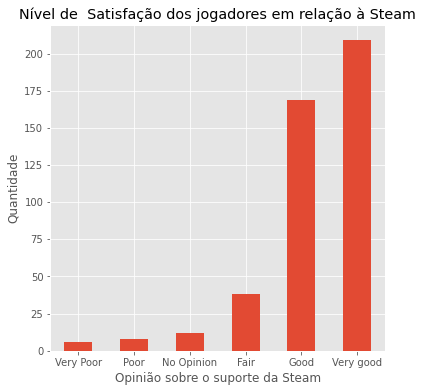

In [91]:
df_limpo["SatisfactionSteam"].value_counts(ascending=True).plot.bar(title = "Nível de  Satisfação dos jogadores em relação à Steam")
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Opinião sobre o suporte da Steam")
plt.ylabel("Quantidade")
plt.xticks(rotation='horizontal');

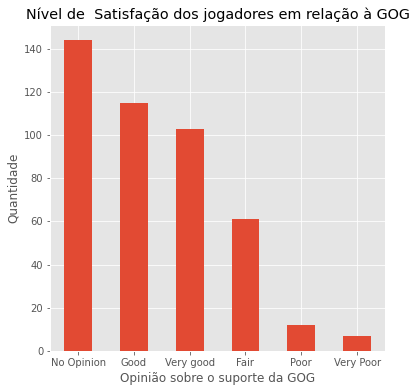

In [89]:
df_limpo["SatisfactionGOG"].value_counts(ascending=False).plot.bar(title = "Nível de  Satisfação dos jogadores em relação à GOG" )
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Opinião sobre o suporte da GOG")
plt.ylabel("Quantidade")
plt.xticks(rotation='horizontal');


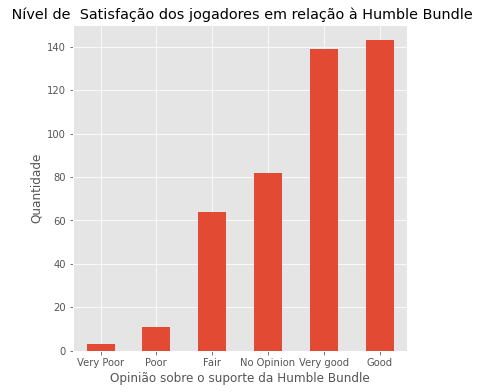

In [90]:
df_limpo["SatisfactionHB"].value_counts(ascending=True).plot.bar(title = " Nível de  Satisfação dos jogadores em relação à Humble Bundle")
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Opinião sobre o suporte da Humble Bundle")
plt.ylabel("Quantidade")
plt.xticks(rotation='horizontal');


#### Observando os gráficos acima é possível concluir que a empresa com melhor suporte para os jogos nativos ou portados voltados ao público Linux é a Steam, seguida pela Humble Bundle, e os jogadores em sua maioria não tem uma opinião bem formada em relação ao suporte da GOG, mesmo que poucos o considerem ruim.

### Aprofundando um pouco mais o conhecimento sobre o Linux, passamos a ouvir muito o termo "distro"(ou distribuição) que nada mais é que um Sistema Operacional propriamente dito, sendo o Linux o kernel de inúmeros sistemas operacionais, tantos que é mais fácil chamar todos de Linux, quando na verdade são sistemas baseados no kernel Linux. Como existem inúmeras, algumas podem se destacar para uso empresarial, escritórios, e outras para jogos.
### Pense nas distros como se fossem as versões atuais do Windows 10, uma voltada a trabalho leve e navegação que seria a Home, e a versão Pro que tem suporte a mais aplicativos e é mais recomendada a trabalhos pesados, porém existem mais de 200 ativas cada uma com versões que atendem a diferentes públicos

#### OBS: Kernel é a parte do sistema operacional que se comunica diretamente com o hardware e gerenciando os recursos de um pc e se comunicando com os drivers antes mesmo dos apps do sistema

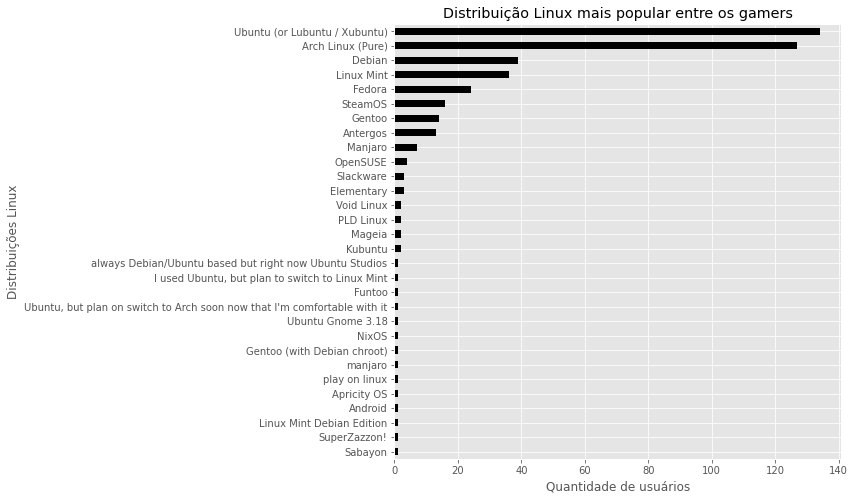

In [85]:
# Qual a distribuição mais utilizada para jogar nos sistemas Linux?


df_limpo["LinuxGamingDistro"].value_counts(ascending=True).plot.barh(color="black", title = "Distribuição Linux mais popular entre os gamers")
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel("Quantidade de usuários")
plt.ylabel("Distribuições Linux")
plt.xticks(rotation='horizontal');


#### Pode-se notar que a maioria dos usuários joga na distro Ubuntu, que tem como versões o Lubuntu e o Xubuntu.
#### As quatro distribuições Linux mais populares para jogar no começo de 2016 eram Ubuntu, Arch Linux, Debian e Linux Mint.
#### O SteamOS que foi desenvolvido pela própria Steam com o intuito de ser leve e otimizado para jogos aparece apenas na sexta posição, provavelmente por ser um lançamento na época da pesquisa, atraindo desta maneira a atenção principalmente de entusiastas.

### Algo comum no "mundo Linux" é sempre buscar a distro mais leve e otimizada para cada perfil de máquina, de modo que esta agrade o usuário, em meio a mais de 200 sistemas algum irá agradar mais cada pessoa e se tornará sua distro principal.
#### Pensando assim muitas pessoas trocam de distro como trocam de roupa, acreditando que há um significativo impacto na performance do sistema, vamos agora analisar a frequência de troca de sistema operacional Linux e quais mais roubam performance de suas máquinas, deixando os jogos menos performáticos segundo os usuários.

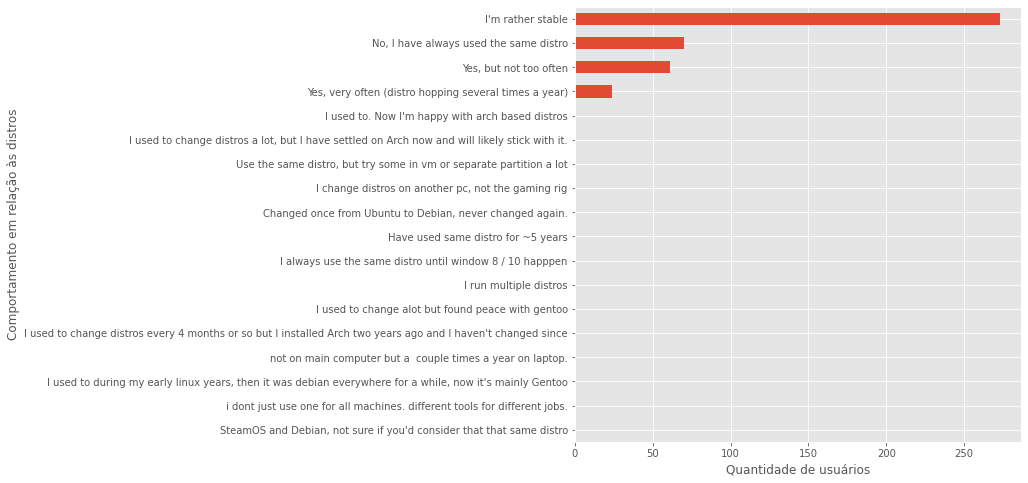

In [67]:
df_limpo["DistroChangeFrequency"].value_counts(ascending=True).plot.barh()
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel("Quantidade de usuários")
plt.ylabel("Comportamento em relação às distros")
plt.xticks(rotation='horizontal');        


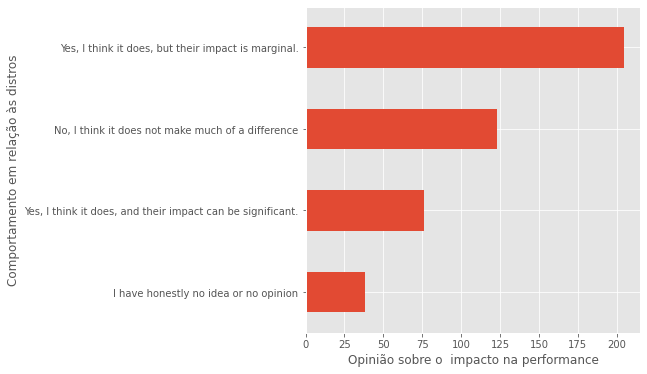

In [66]:
df_limpo["DistroImpactPerformance"].value_counts(ascending=True).plot.barh()
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel("Opinião sobre o  impacto na performance")
plt.ylabel("Comportamento em relação às distros")
plt.xticks(rotation='horizontal');        
              

#### Analisando os gráficos plotados acima, é possível perceber que a grande maioria dos usuários prefere continuar na mesma distro seja pela estabilidade do mesmo, ou nunca mudou de sistema. Podendo ser pela comodidade de não passar por um novo processo de instalação de SO e busca de drivers, ou quaisquer outro motivo. A minoria troca de distro de tempos em tempos e pouquíssimos usuários sempre mudam de SO, pois, há vários lançamentos durante o ano
#### Já no quesito impacto da distro no sistema, a maioria acredita que há um impacto, mas que este por usa vez é pequeno, alguns acham que o impacto é significativo, provavelmente são os mesmos usuários que buscam pela "distro perfeita" e mudam de SO todo o tempo.

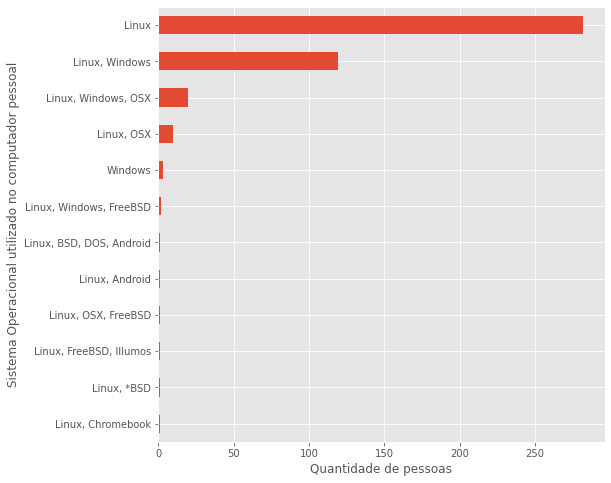

In [55]:
df_limpo["DesktopOS"].value_counts(ascending=True).plot.barh()
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Sistema Operacional utilizado no computador pessoal");

In [57]:
# Transformando LinuxUserHowLong em dados numéricos para realizar um agrupamento
## Between five years and ten years se tornará 7.5
## Less than a year se tornará 10 meses ou 0.8333
## Between three and four years se tornará 3.5
## Longer than ten years se  tornará 12 anos
## Between one and two years se tornará 1.5
## Between four and five years se tornará 4.5
## Between two and three years se tornará 2.5


df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].replace(['Between five years and ten years'],'7.5')
df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].replace(['Less than a year'],'0.8333')
df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].replace(['Between three and four years'],'3.5')
df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].replace(['Longer than ten years'],'12')
df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].replace(['Between one and two years'],'1.5')
df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].replace(['Between four and five years'],'4.5')
df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].replace(['Between two and three years'],'2.5')

In [58]:
 df_limpo['LinuxUserHowLong'] = df_limpo['LinuxUserHowLong'].astype('float')

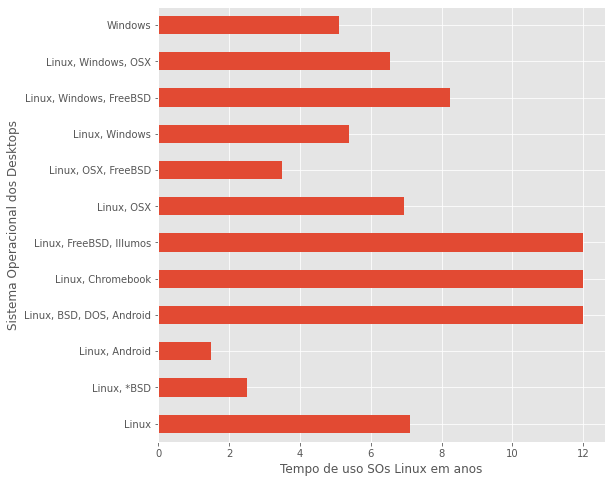

In [59]:
df_limpo.groupby("DesktopOS")["LinuxUserHowLong"].mean().plot.barh()
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Tempo de uso SOs Linux em anos")
plt.ylabel("Sistema Operacional dos Desktops");

#### Através do gráfico acima pode-se concluir que os usuários mais experientes e avançados no uso de Linux utilizam distros Linux em seus computadores principais, seja apenas uma, um dual boot com Windows, ou até mesmo sistemas Apple(OSX). Porém, observa-se que a grande maioria tenta utilizar apenas sistemas Unix/Linux para sua utilização fora do ambiente de trabalho, recorrendo ao Windows para o uso de aplicações específicas ou algumas facilidades do sistema.

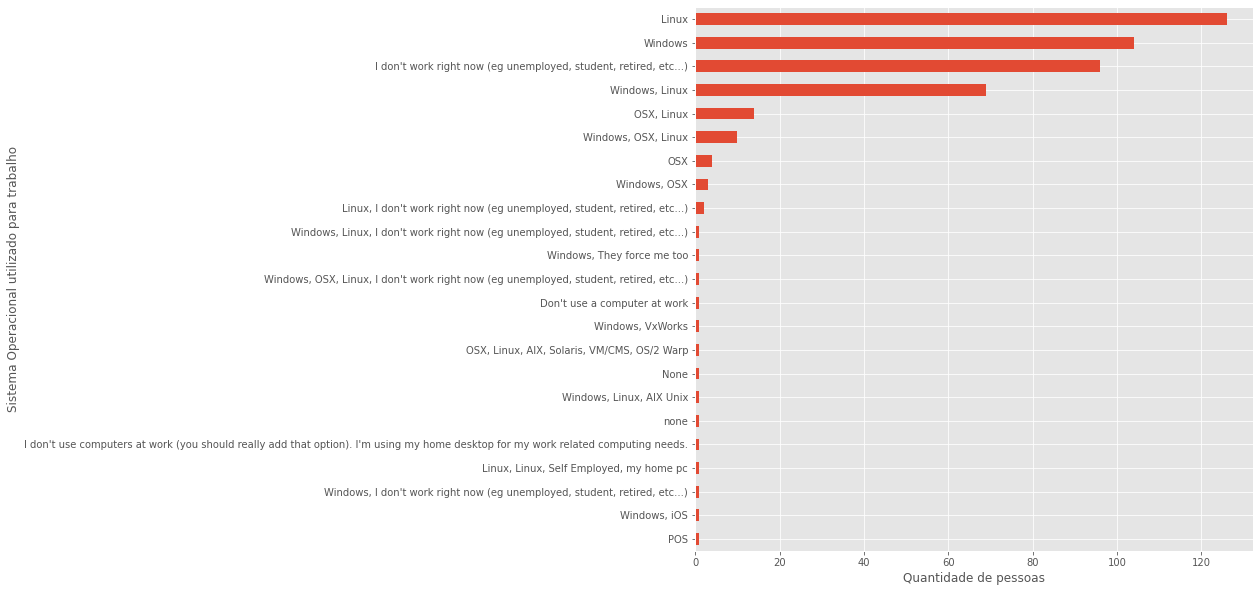

In [61]:
df_limpo["WorkOS"].value_counts(ascending=True).plot.barh()
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Sistema Operacional utilizado para trabalho");

#### Como o sistema operacional de trabalho pode ser algo imposto pela empresa/organização na qual cada indivíduo trabalha, por diversas vezes não se tem tanta opção de escolha, a não ser que se trabalhe remotamente, ou seja um "freelancer". Sendo assim, Linux e Windows disputam muito o mercado neste quesito cada qual com suas vantagens, seja a facilidade e compatibilidade do Windows para desktops simples, ou a leveza e segurança do Linux para servidores e pequenas empresas que querem economizar com licenças do Windows, pois, boa parte das distros linux é gratuita para o uso, porém tem pouco suporte.

In [62]:
df_limpo["LinuxUserHowLong"].unique

<bound method Series.unique of 1       0.8333
2       7.5000
3       0.8333
4       3.5000
5      12.0000
        ...   
552     0.8333
553    12.0000
555    12.0000
558     7.5000
559     7.5000
Name: LinuxUserHowLong, Length: 443, dtype: float64>

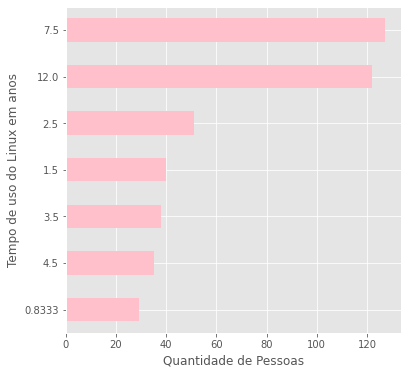

In [64]:
df_limpo["LinuxUserHowLong"].value_counts(ascending=True).plot.barh(color="pink")
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Quantidade de Pessoas")
plt.ylabel("Tempo de uso do Linux em anos");

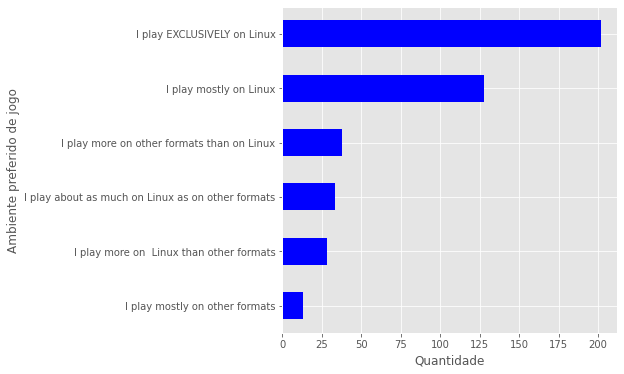

In [65]:
df_limpo["LinuxExclusivity"].value_counts(ascending=True).plot.barh(color="blue")
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Quantidade")
plt.ylabel("Ambiente preferido de jogo");

### Percebe-se através do gráfico abaixo que os usuários que mais jogam no Linux, seja exclusivamente ou principalmente, são também os que tem mais tempo de uso neste sistema. Dessa forma pode-se dizer que são também os mais experientes em utilizar e extrair o máximo de seus sistemas.

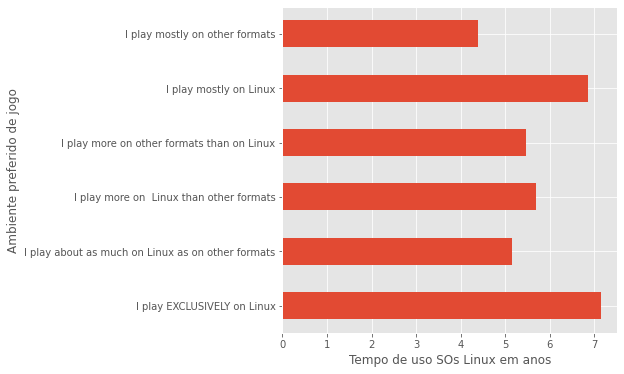

In [110]:
df_limpo.groupby("LinuxExclusivity")["LinuxUserHowLong"].mean().plot.barh("Influência do tempo de uso Linux no comportamento de seus usuários")
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Tempo de uso SOs Linux em anos")
plt.ylabel("Ambiente preferido de jogo");

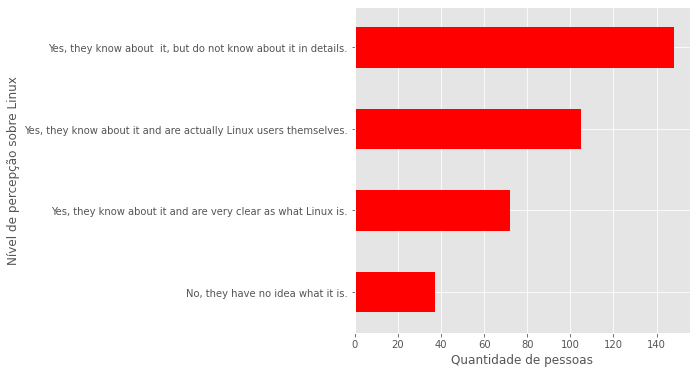

In [70]:
df_limpo["FolksAroundYouAwareLinux"].value_counts(ascending=True).plot.barh(color="red")
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Nível de percepção sobre Linux");

#### No gráfico acima vemos que nos círculos sociais dos usuários que jogam nos sistemas Linux, boa parte das pessoas conhece ou usa Linux.

#### Abaixo está plotado um gráfico que mostra a quantidade de máquinas Linux para os hardwares dos usuários, percebe-se que a maioria é tradicional e utiliza o sistema em desktops e notebooks, ao mesmo passo que vários usuários tem diversos hardwares e utilizam linux em vários devices, tais como: raspberry pies, chromebooks, tablets, smartphones; uma vantagem dos SOs baseados em Linux que podem se adequar ao hardware utilizado por serem sistemas modulares.
##### OBS: Em sistemas modulares se instala apenas o necessário para que se execute o que ele foi pensado para, dessa forma se economiza espaço e processamento ao descartar apps pesados que serão pouco utilizados.
#### OBS: Duplo clique para dar zoom e melhor visualizar os dados.

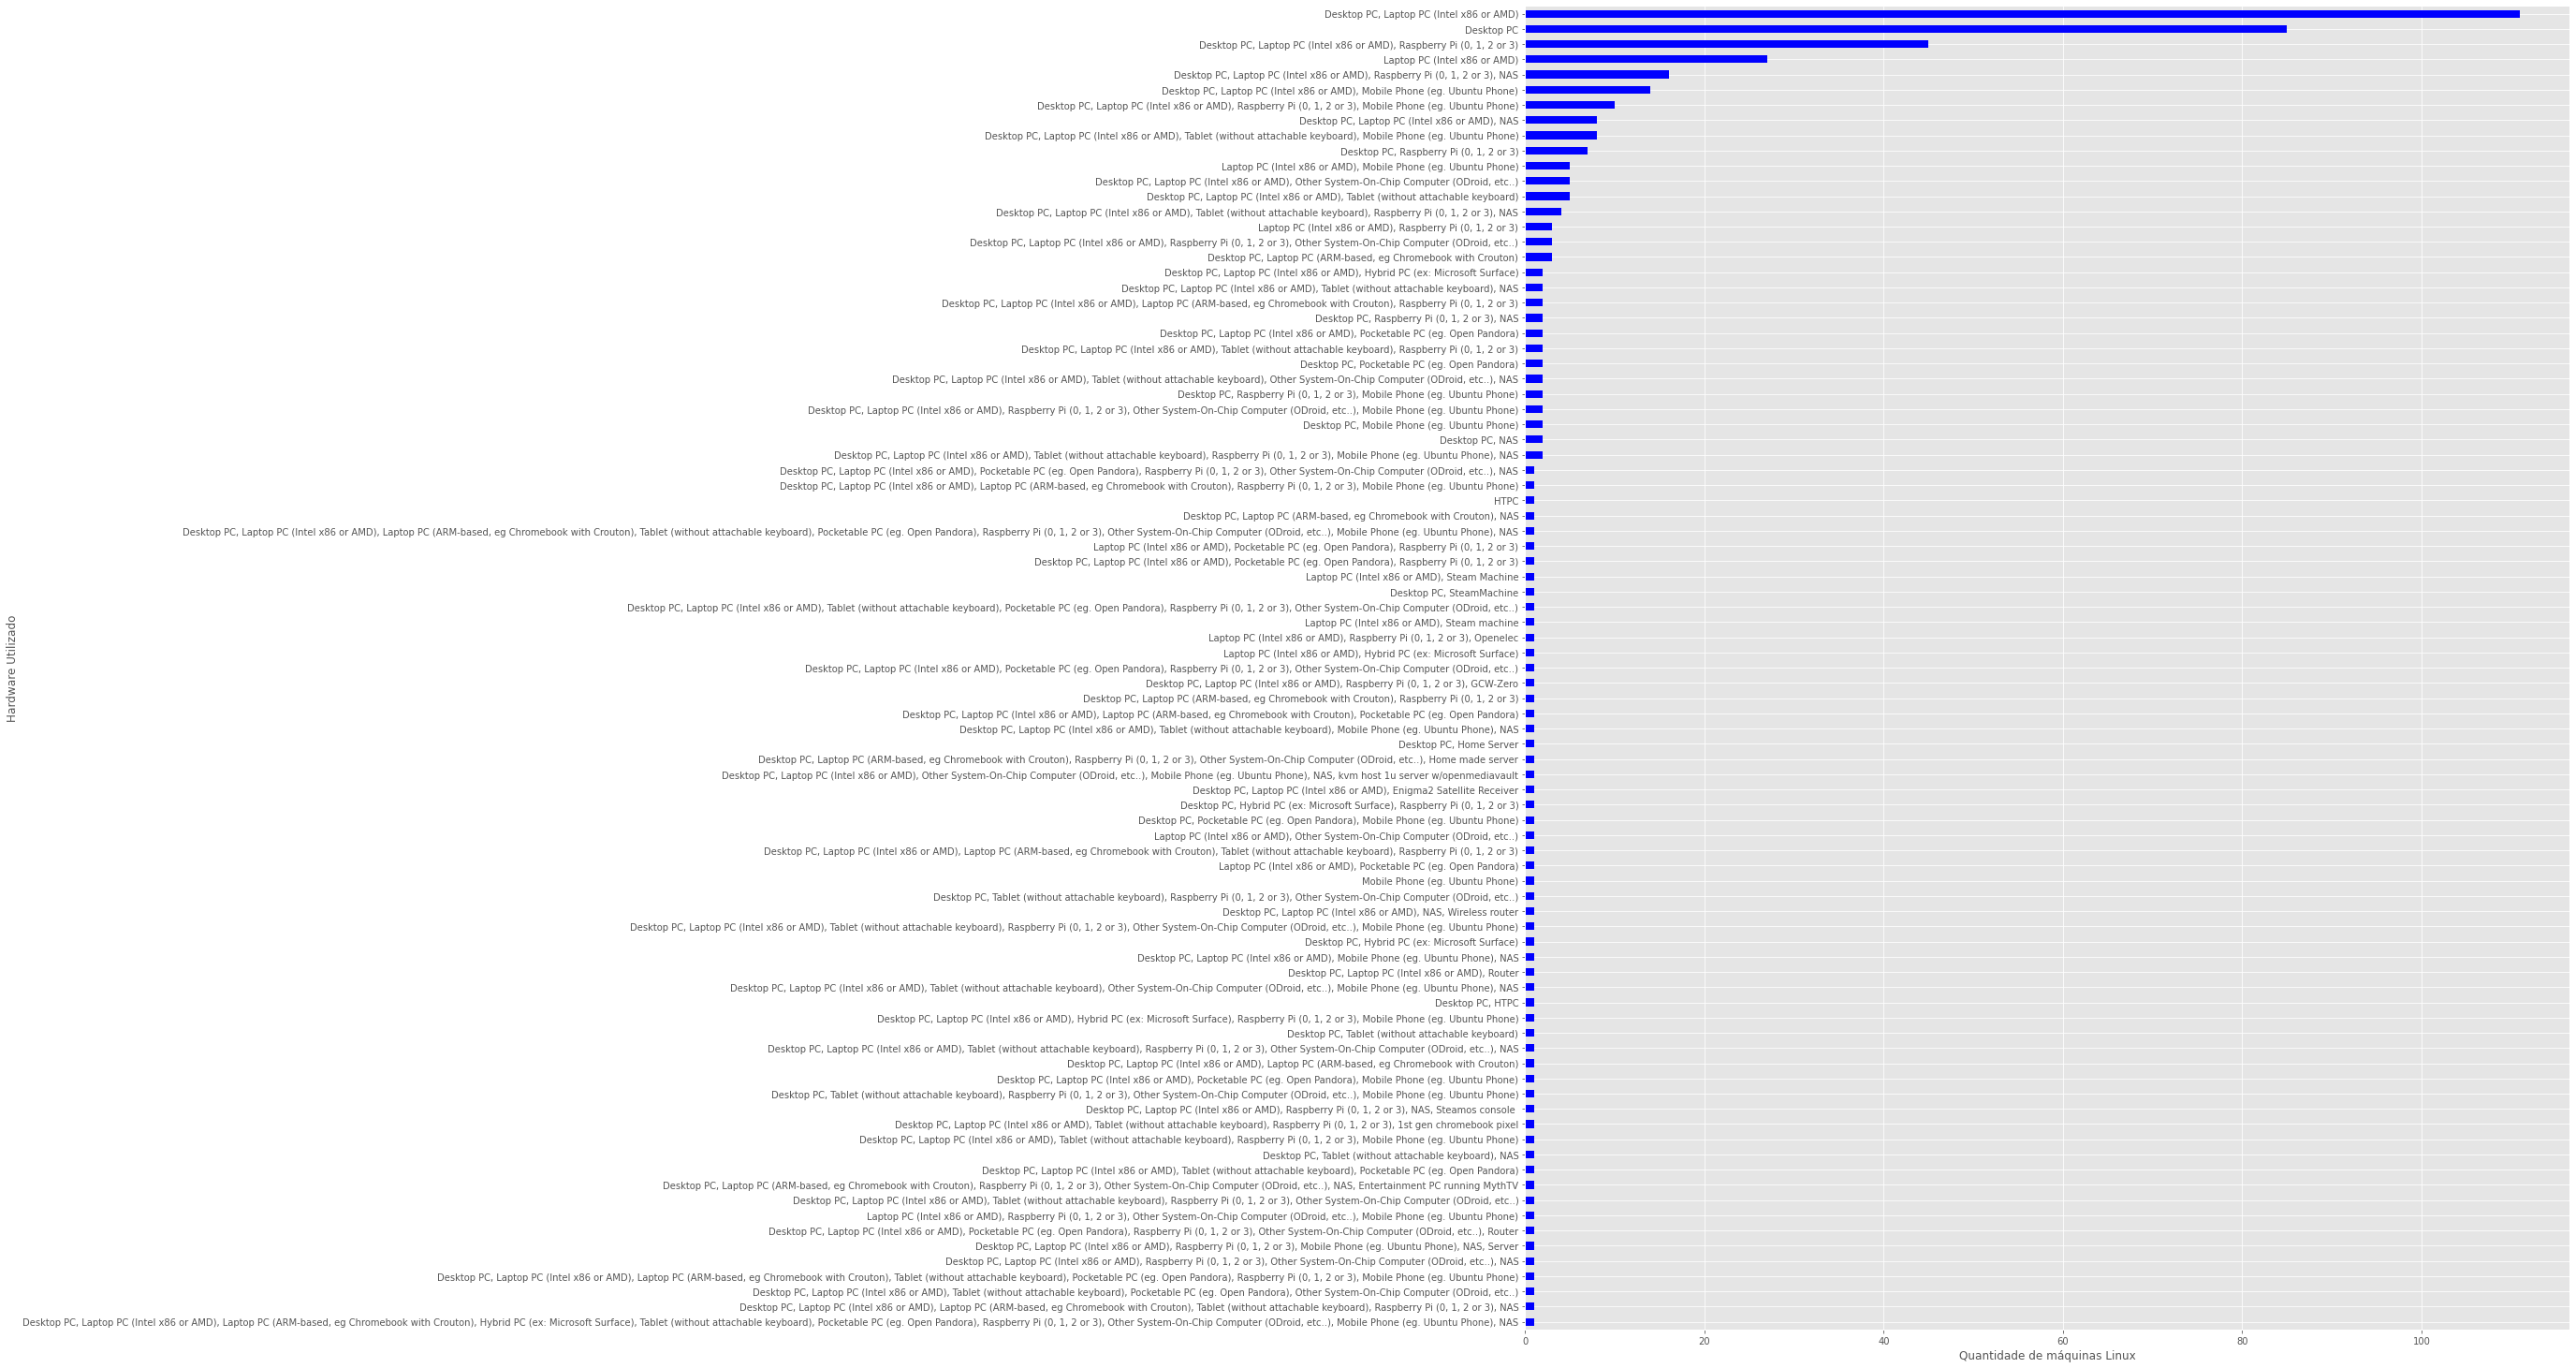

In [72]:
df_limpo['LinuxHardware'].value_counts(ascending=True).plot.barh(color="blue")
plt.rcParams["figure.figsize"] = (20,26)
plt.ylabel("Hardware Utilizado")
plt.xlabel("Quantidade de máquinas Linux");

### Afim de descobrir quais as placas de vídeo mais utilizadas será criado um mini dataframe apenas com esses valores para se plotar um gráfico mostrando quais as preferências dos jogadores Linux no componente responsável pela renderização e processamento gráfico dos jogos.

In [73]:
df_limpogpu = df_limpo.groupby(['LinuxGamingMainGPU', 'LinuxGamingMainGPUModel'], as_index = False).agg({'LinuxGamingMainGPUModel': list})
df_limpogpu.head(2)

,LinuxGamingMainGPU,LinuxGamingMainGPUModel
0,AMD,[290x ]
1,AMD,[380]


In [74]:
df_limpogpu.dtypes

LinuxGamingMainGPU         object
LinuxGamingMainGPUModel    object
dtype: object

In [75]:
df_limpo["LinuxGamingMainGPU"].describe()

count        442
unique         8
top       nVidia
freq         310
Name: LinuxGamingMainGPU, dtype: object

In [76]:
df_limpo["LinuxGamingMainGPUModel"].describe()

count                  303
unique                 186
top       GeForce GTX 970 
freq                    54
Name: LinuxGamingMainGPUModel, dtype: object

#### Percebe-se que a GPU mais utilizada pelos jogadores no Linux é nVidia GeForce GTX 970, provavelmente pela empresa sempre atualizar os drivers para Linux, ao contrário da AMD que dá suporte a raros modelos e por pouco tempo após o lançamento de suas GPUs.

##### OBS: Não foi possível plotar gráficos, pois, o dataset contém um erro que mesmo após alterado pelos editores, excel e onlyoffice persiste, e dessa forma ele acaba por não somar no gráfico do value_counts, a causa do erro é pelas colunas estarem todas como objetos aparentemente, procurei no link https://stackoverflow.com/questions/53993556/pythonpandas-object-to-string-type-conversion-in-dataframe e a última resposta há 7 meses ainda encontra erros quando se tenta converter objeto em string no pandas, por alguma razão o describe consegue indicar corretamente os valores mais frequentes, neste caso ele foi utilizado.

### Utilizando o seaborn para performar uma correlação entre os dados que foram convertidos para o tipo numérico e descobrir o que mais influencia a quantidade de horas jogadas semanalmente.

In [77]:
df_limpocorr = df_limpo.set_index('Geography')

In [78]:
### Transformando Gender em dados numéricos para se aplicar na correlação abaixo e gerar um gráfico heatmap com a lib seaborn
### Male se tornará 0
### Female se tornará 1
### Other se tornará 2

df_limpocorr['Gender'] = df_limpocorr['Gender'].replace(['Male'],'2')
df_limpocorr['Gender'] = df_limpocorr['Gender'].replace(['Female'],'1')
df_limpocorr['Gender'] = df_limpocorr['Gender'].replace(['Other'],'0')

In [79]:
 df_limpocorr['Gender'] = df_limpocorr['Gender'].astype('float')

In [80]:
correlacao = df_limpocorr.corr(method="kendall")
correlacao.loc['LinuxGamingHoursPerWeek']

Age                       -0.081759
Gender                     0.049157
LinuxUserHowLong          -0.122626
LinuxGamingHoursPerWeek    1.000000
Index                     -0.008738
Name: LinuxGamingHoursPerWeek, dtype: float64

### Abaixo está um esboço de correlação cujos fatores mais influenciam a quantidade de horas jogadas.

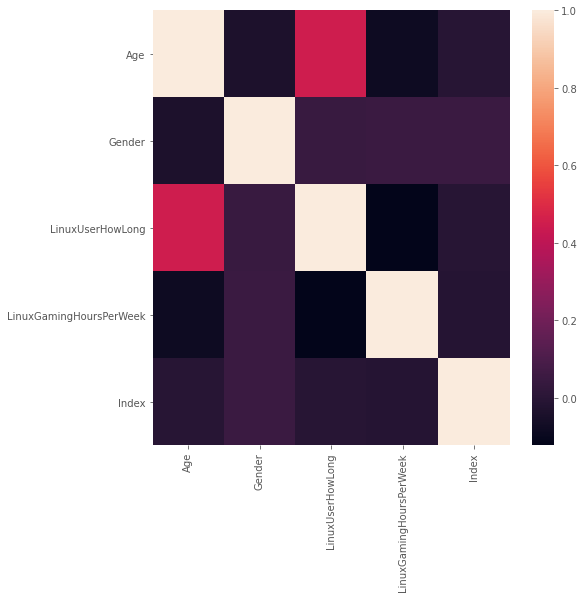

In [84]:
sns.heatmap(correlacao)
plt.rcParams["figure.figsize"] = (8,8)